In [403]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [404]:
train_data = pd.read_excel('Data_Train.xlsx')

In [405]:
train_data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [406]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [407]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [408]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [409]:
train_data.dropna(inplace = True)

In [410]:
train_data['Journey_Day'] = pd.to_datetime(train_data['Date_of_Journey'], infer_datetime_format = True).dt.day
train_data['Month'] = pd.to_datetime(train_data['Date_of_Journey'], infer_datetime_format = True).dt.month
train_data['Year'] = pd.to_datetime(train_data['Date_of_Journey'], infer_datetime_format = True).dt.year

In [411]:
train_data.drop(['Date_of_Journey', 'Year'], axis = 1, inplace = True)

In [412]:
train_data['Dep_Hour'] = pd.to_datetime(train_data['Dep_Time'], infer_datetime_format=True).dt.hour
train_data['Dep_Minutes'] = pd.to_datetime(train_data['Dep_Time'], infer_datetime_format=True).dt.minute

In [413]:
train_data.drop('Dep_Time', axis = True, inplace = True)

In [414]:
train_data['Arv_Hour'] = pd.to_datetime(train_data['Arrival_Time'], infer_datetime_format=True).dt.hour
train_data['Arv_Minutes'] = pd.to_datetime(train_data['Arrival_Time'], infer_datetime_format=True).dt.minute

In [415]:
train_data.drop('Arrival_Time', axis = True, inplace = True)

In [416]:
train_data['Duration_H'] = pd.to_timedelta(train_data['Duration']).dt.components['hours']
train_data['Duration_M'] = pd.to_timedelta(train_data['Duration']).dt.components['minutes']

In [417]:
train_data.drop('Duration', axis = 1, inplace = True)

In [418]:
airline = pd.get_dummies(train_data[['Airline']], drop_first = True)

In [419]:
source = pd.get_dummies(train_data[['Source']], drop_first = True)

In [420]:
destination = pd.get_dummies(train_data[['Destination']], drop_first = True)

In [421]:
train_data.replace({'non-stop' : 0, '1 stop': 1, '2 stops' : 2, '3 stops' : 3, '4 stops' : 4}, inplace = True)

In [422]:
train_data = pd.concat([train_data, airline, source, destination], axis = 1)

In [423]:
train_data.drop(['Airline', 'Destination', 'Source', 'Route', 'Additional_Info'], axis = 1, inplace = True)

In [424]:
train_data.shape

(10682, 30)

In [425]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Month', 'Dep_Hour',
       'Dep_Minutes', 'Arv_Hour', 'Arv_Minutes', 'Duration_H', 'Duration_M',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [426]:
test_data = pd.read_excel('Test_set.xlsx')

In [427]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [428]:
test_data.Airline.value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [429]:
test_data.dropna(inplace = True)

test_data['Journey_Day'] = pd.to_datetime(test_data['Date_of_Journey'], infer_datetime_format = True).dt.day
test_data['Month'] = pd.to_datetime(test_data['Date_of_Journey'], infer_datetime_format = True).dt.month
test_data['Year'] = pd.to_datetime(test_data['Date_of_Journey'], infer_datetime_format = True).dt.year

test_data.drop(['Date_of_Journey', 'Year'], axis = 1, inplace = True)

test_data['Dep_Hour'] = pd.to_datetime(test_data['Dep_Time'], infer_datetime_format=True).dt.hour
test_data['Dep_Minutes'] = pd.to_datetime(test_data['Dep_Time'], infer_datetime_format=True).dt.minute

test_data.drop('Dep_Time', axis = True, inplace = True)

test_data['Arv_Hour'] = pd.to_datetime(test_data['Arrival_Time'], infer_datetime_format=True).dt.hour
test_data['Arv_Minutes'] = pd.to_datetime(test_data['Arrival_Time'], infer_datetime_format=True).dt.minute

test_data.drop('Arrival_Time', axis = True, inplace = True)

test_data['Duration_H'] = pd.to_timedelta(test_data['Duration']).dt.components['hours']
test_data['Duration_M'] = pd.to_timedelta(test_data['Duration']).dt.components['minutes']

test_data.drop('Duration', axis = 1, inplace = True)


airline = pd.get_dummies(test_data[['Airline']], drop_first = True)
source = pd.get_dummies(test_data[['Source']], drop_first = True)
destination = pd.get_dummies(test_data[['Destination']], drop_first = True)

test_data.replace({'non-stop' : 0, '1 stop': 1, '2 stops' : 2, '3 stops' : 3, '4 stops' : 4}, inplace = True)

test_data = pd.concat([test_data, airline, source, destination], axis = 1)

test_data.drop(['Airline', 'Destination', 'Source', 'Route', 'Additional_Info'], axis = 1, inplace = True)

print(test_data.shape)

(2671, 28)


### Feature Selection

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

**heatmap**

**feature_importance_**

**SelectKBest**

In [430]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Month', 'Dep_Hour',
       'Dep_Minutes', 'Arv_Hour', 'Arv_Minutes', 'Duration_H', 'Duration_M',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [431]:
test_data.columns

Index(['Total_Stops', 'Journey_Day', 'Month', 'Dep_Hour', 'Dep_Minutes',
       'Arv_Hour', 'Arv_Minutes', 'Duration_H', 'Duration_M',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [432]:
x = train_data.loc[:,['Total_Stops', 'Journey_Day', 'Month', 'Dep_Hour',
       'Dep_Minutes', 'Arv_Hour', 'Arv_Minutes', 'Duration_H', 'Duration_M',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

y = train_data.iloc[:,1]

In [435]:
train_data

,Total_Stops,Price,Journey_Day,Month,Dep_Hour,Dep_Minutes,Arv_Hour,Arv_Minutes,Duration_H,Duration_M,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


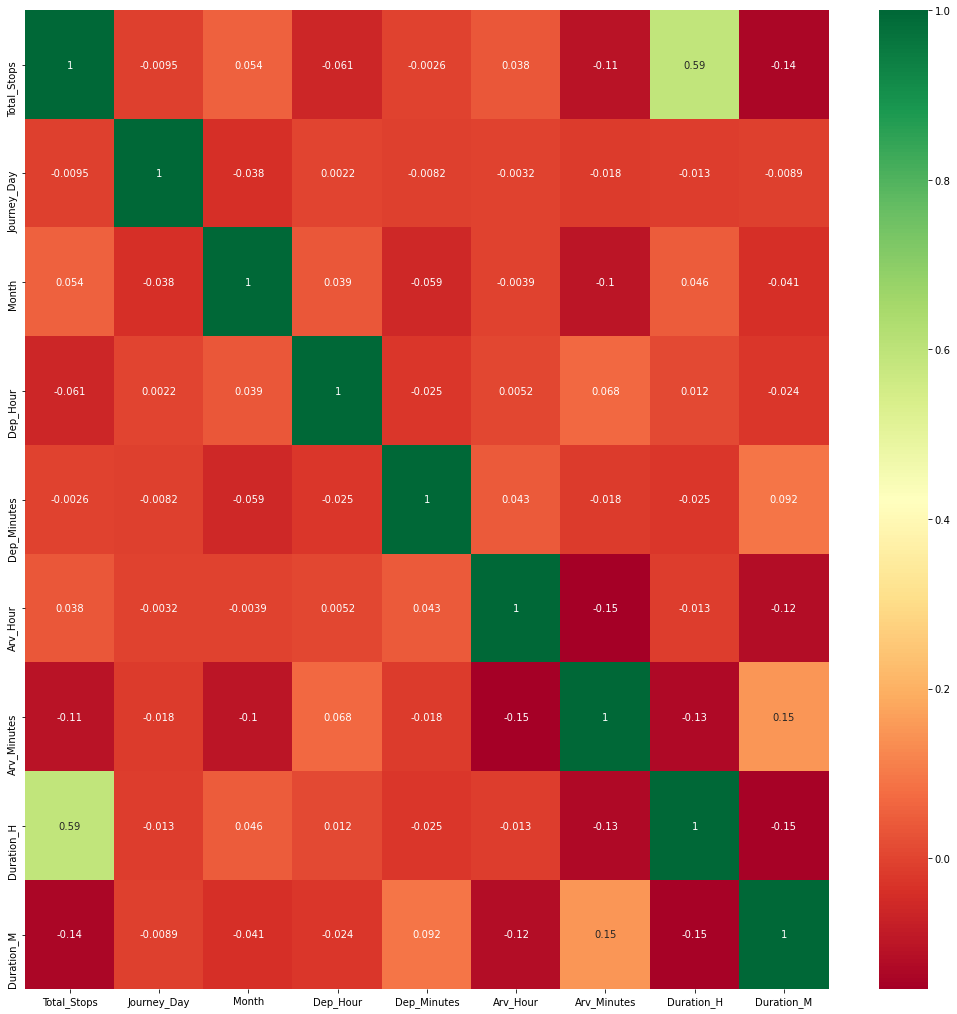

In [437]:

# Finds correlation between Independent and dependent attributes
data_hm = train_data[['Total_Stops', 'Journey_Day', 'Month', 'Dep_Hour','Dep_Minutes', 'Arv_Hour', 'Arv_Minutes', 'Duration_H', 'Duration_M']]
plt.figure(figsize = (18,18))
sns.heatmap(data_hm.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [445]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [446]:
print(selection.feature_importances_)

[2.37857052e-01 1.45210788e-01 5.28480494e-02 2.36977525e-02
 2.13738355e-02 2.75512837e-02 1.97047046e-02 1.13672838e-01
 1.80837737e-02 1.12567259e-02 1.80056857e-03 2.00873868e-02
 1.35761592e-01 6.72850391e-02 1.70004923e-02 8.02506048e-04
 3.27110707e-03 1.44592695e-04 5.57242457e-03 8.29929530e-05
 5.65487250e-04 8.52721964e-03 3.54715698e-03 5.64616513e-03
 9.61602098e-03 1.67306416e-02 7.26462976e-03 5.14202733e-04
 2.45229704e-02]


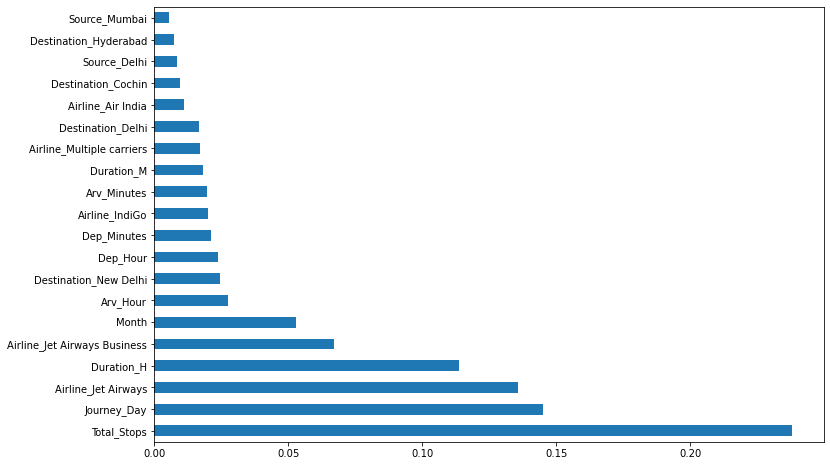

In [447]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index = x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [450]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [453]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [454]:
y_pred = reg_rf.predict(x_test)

In [455]:
print('Training Score is : ', reg_rf.score(x_train, y_train))
print('Testing Score is : ', reg_rf.score(x_test, y_test))

Training Score is :  0.9527103145410261
Testing Score is :  0.8390877754775752


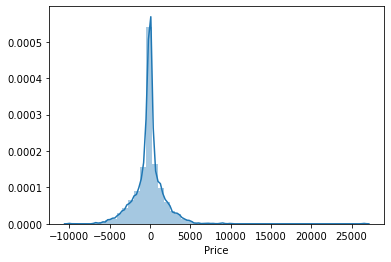

In [456]:
sns.distplot(y_test-y_pred)
plt.show()

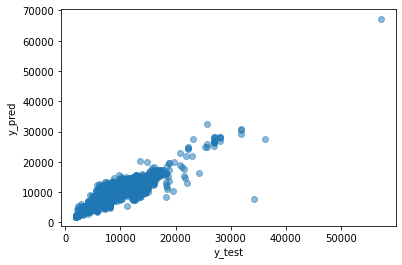

In [457]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [460]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 :', metrics.r2_score(y_test, y_pred))

MAE: 1160.5172755319084
MSE: 3469598.44839869
RMSE: 1862.6858158043428
R^2 : 0.8390877754775752


In [461]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  12.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 10.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [462]:
print(rf_random.best_params_)

{'n_estimators': 700, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}


In [463]:
prediction = rf_random.predict(x_test)

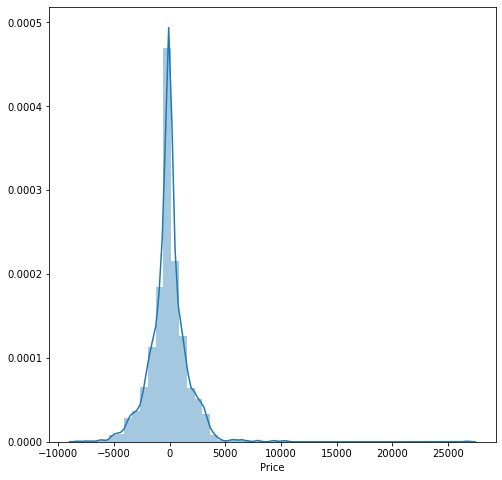

In [464]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

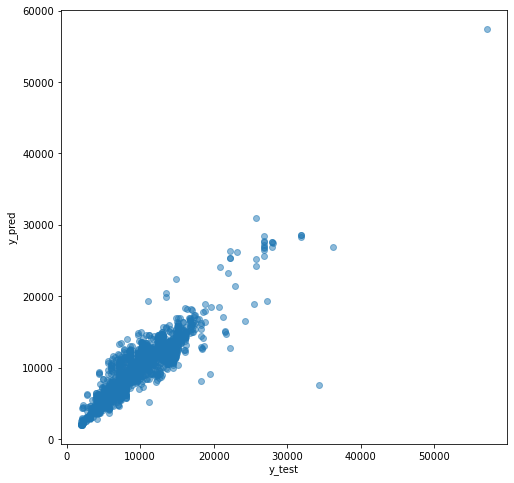

In [465]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [467]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R^2 :', metrics.r2_score(y_test, prediction))

MAE: 1140.050845899333
MSE: 3133700.2026152904
RMSE: 1770.2260315042513
R^2 : 0.8546659856785662
